### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

In [123]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import and download library for text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
import random

In [124]:
# Load Dataset
# df = pd.read_csv("/content/drive/MyDrive/nlp/dataset/emotion-dataset.csv")
path = '/content/drive/MyDrive/nlp/dataset2/'
train_path = path+'Emotions dataset for NLP/train.txt'
test_path = path+'Emotions dataset for NLP/test.txt'
val_path = path+'Emotions dataset for NLP/val.txt'

In [125]:
train_df = pd.read_csv(train_path, sep=';', names=['text', 'labels'])
test_df = pd.read_csv(test_path, sep=';', names=['text', 'labels'])
val_df = pd.read_csv(val_path, sep=';', names=['text', 'labels'])
full_df = pd.concat([train_df, val_df], axis=0)

In [126]:
print("Train text size", train_df.shape[0])
print("Test text size", test_df.shape[0])
print("Val text size", val_df.shape[0])
print("\nTotal samples", (train_df.shape[0]+test_df.shape[0]+val_df.shape[0]))

Train text size 16000
Test text size 2000
Val text size 2000

Total samples 20000


Describe Dataa

In [131]:
train_df['Length'] = train_df.text.apply(lambda x:len(x))

In [132]:
print(train_df.Length.max())
print(train_df.Length.min())

300
7


In [133]:
train_df[['Length']].describe()

,Length
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


Encoding Data

In [134]:
def label_encode(data,label):
    labels=data[label].map(
    {
        "joy":0,
        "sadness":1,
        "anger":2,
        "fear":3,
        "love":4,
        "surprise":5
    }
    )
    return labels

labels = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']

In [135]:
train_df['enc_labels'] = label_encode(train_df, 'labels')
test_df['enc_labels'] = label_encode(test_df, 'labels')
val_df['enc_labels'] = label_encode(val_df, 'labels')

In [136]:
train_df.head()

,text,labels,Length,enc_labels
0,i didnt feel humiliated,sadness,23,1
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness,108,1
2,im grabbing a minute to post i feel greedy wrong,anger,48,2
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love,92,4
4,i am feeling grouchy,anger,20,2


Text Processing


In [137]:
def lower_text(text):
    # lowercase the text 
    return text.lower()

def remove_number(text):
    # remove number with regex
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'', text)

def remove_punct(text):
    # remove punctuations
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" 
    for p in punctuations:
        text = text.replace(p, f' {p} ')
    return text

def nltk_process(text):
    list1 = word_tokenize(text)
    text = ' '.join([lemmatizer.lemmatize(words) for words in list1])
    list1 = word_tokenize(text)
    text = " ".join([word for word in list1 if word not in (stopwords)])
    return text

def data_preparation(text):
    text = lower_text(text)
    text = remove_number(text)
    text = nltk_process(text)
    text = remove_punct(text)
  
    return text

In [138]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')


seed = 101
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [139]:
train_df["clean_text"] = train_df["text"].apply(data_preparation)
test_df["clean_text"] = test_df["text"].apply(data_preparation)
val_df["clean_text"] = val_df["text"].apply(data_preparation)

In [140]:
train_df['Clean_Length'] = train_df['clean_text'].apply(lambda x:len(x))

In [141]:
train_df.head(10)

,text,labels,Length,enc_labels,clean_text,Clean_Length
0,i didnt feel humiliated,sadness,23,1,didnt feel humiliated,21
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness,108,1,go feeling hopeless damned hopeful around someone care awake,60
2,im grabbing a minute to post i feel greedy wrong,anger,48,2,im grabbing minute post feel greedy wrong,41
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love,92,4,ever feeling nostalgic fireplace know still property,52
4,i am feeling grouchy,anger,20,2,feeling grouchy,15
5,ive been feeling a little burdened lately wasnt sure why that was,sadness,65,1,ive feeling little burdened lately wasnt sure wa,48
6,ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny,surprise,122,5,ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny,94
7,i feel as confused about life as a teenager or as jaded as a year old man,fear,73,3,feel confused life teenager jaded year old man,46
8,i have been with petronas for years i feel that petronas has performed well and made a huge profit,joy,98,0,petronas year feel petronas ha performed well made huge profit,62
9,i feel romantic too,love,19,4,feel romantic,13


Text Tokenize

In [142]:
X_train = train_df['clean_text']
X_test = test_df['clean_text']
y_train = train_df['enc_labels']
y_test = test_df['enc_labels']
y_val = val_df['enc_labels']

In [143]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(val_df['clean_text'])

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

13464


In [144]:
X_train = pad_sequences(X_train, padding='post', maxlen=128)
X_test = pad_sequences(X_test, padding='post', maxlen=128)
X_val = pad_sequences(X_val, padding='post', maxlen=128)

In [145]:
OHE_y_test = to_categorical(y_test) # One Hot Encode apply
OHE_y_train = to_categorical(y_train)
OHE_y_val = to_categorical(y_val)

Model Building

In [146]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

In [148]:
model = Sequential([
    Embedding(vocab_size, 128, input_length=128, name='in_layer'),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(512, return_sequences=True, name='Bi-LSTM-2')),
    Bidirectional(LSTM(256, return_sequences=True, name='Bi-LSTM-2')),
    Bidirectional(LSTM(128, name='Bi-LSTM-3')),
    Dropout(0.5),
    Dense(512, activation='relu', name='fc-1'),
    Dense(6, activation='softmax', name='out_layer')
])

In [149]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 in_layer (Embedding)        (None, 128, 128)          1723392   
                                                                 
 batch_normalization_3 (Batc  (None, 128, 128)         512       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 128, 128)          0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 128, 1024)        2625536   
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 128, 512)         2623488   
 onal)                                                           
                                                      

In [150]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, OHE_y_train,
                    epochs=20, 
                    verbose=1,
                    validation_data=(X_test, OHE_y_test),
                    batch_size=128)


Epoch 1/2
125/125 [==============================] - 42s 261ms/step - loss: 1.1210 - accuracy: 0.5678 - val_loss: 1.2440 - val_accuracy: 0.6295
Epoch 2/2
125/125 [==============================] - 29s 234ms/step - loss: 0.2587 - accuracy: 0.9089 - val_loss: 0.8998 - val_accuracy: 0.7920


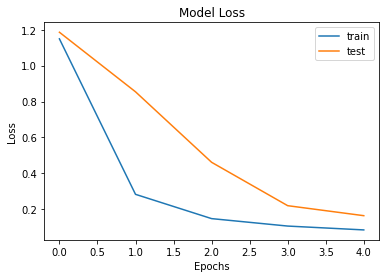

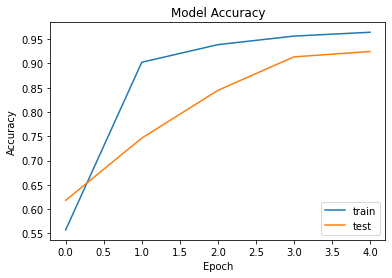

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [151]:
predict = model.predict(X_val)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)

63/63 [==============================] - 4s 30ms/step


In [152]:
from sklearn.metrics import classification_report
print(classification_report(val_df["enc_labels"], predict_class, target_names =["anger", "fear", "joy", "love", "sadness", "surprise"]))

              precision    recall  f1-score   support

       anger       0.85      0.82      0.83       704
        fear       0.80      0.87      0.83       550
         joy       0.56      0.90      0.69       275
        love       0.90      0.56      0.69       212
     sadness       0.81      0.49      0.61       178
    surprise       0.95      0.51      0.66        81

    accuracy                           0.77      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.80      0.77      0.77      2000



In [153]:
print(labels)
def get_key(value):
    dictionary={
        "joy":0,
        "sadness":1,
        "anger":2,
        "fear":3,
        "love":4,
        "surprise":5
    }
    for key,val in dictionary.items():
          if (val==value):
            return key

['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']


In [154]:
def predict_test(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=300,padding='post')
  ans=get_key(np.argmax(model.predict(sentence_padded), axis=1))
  
  print("The emotion predicted is",ans)

In [163]:
sample1='Funeral ceremony...gloomy friday...'

In [164]:
predict_test(sample1)

1/1 [==============================] - 0s 52ms/step
The emotion predicted is sadness
